# Import Necessary Package

In [878]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [879]:
data=pd.read_csv('C:\Rohith\Backup\Desktop\SEM 6\Machine Learning Lab\Practices\Obesity Dataset\ObesityDataSet_raw_and_data_sinthetic.csv')

In [880]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [881]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [882]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [883]:
data.shape

(2111, 17)

In [884]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [885]:
# Drop rows with any null values
data.dropna(inplace=True)

# Drop rows only where all values are null
data.dropna(how='all', inplace=True)


In [886]:
data.duplicated().sum()

24

In [887]:
data.drop_duplicates(inplace=True)
data.shape

(2087, 17)

<Axes: >

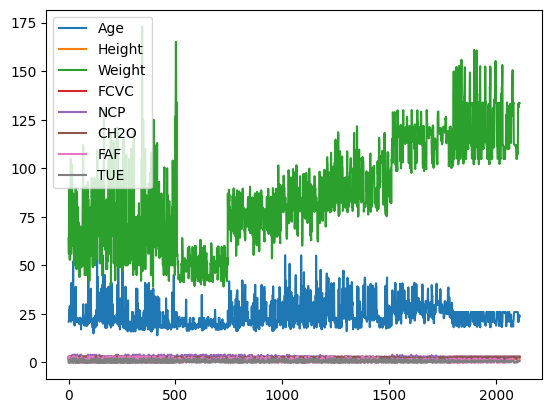

In [888]:
data.plot()

In [889]:
data['Weight'].unique()

array([ 64.      ,  56.      ,  77.      , ..., 133.689352, 133.346641,
       133.472641])

In [890]:
max(data['Weight'].unique())

173.0

{'whiskers': [<matplotlib.lines.Line2D at 0x16076122800>,
 'caps': [<matplotlib.lines.Line2D at 0x16076121bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16076120160>],
 'medians': [<matplotlib.lines.Line2D at 0x16076121630>],
 'fliers': [<matplotlib.lines.Line2D at 0x16076121d80>],
 'means': []}

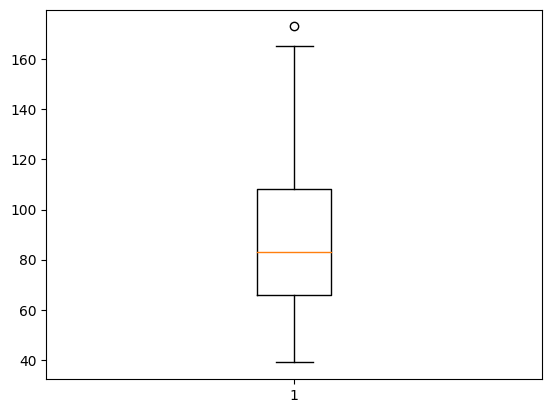

In [891]:
plt.boxplot(data['Weight'])

In [892]:
df=data[data['Weight']<=165]
df.shape

(2085, 17)

<Axes: >

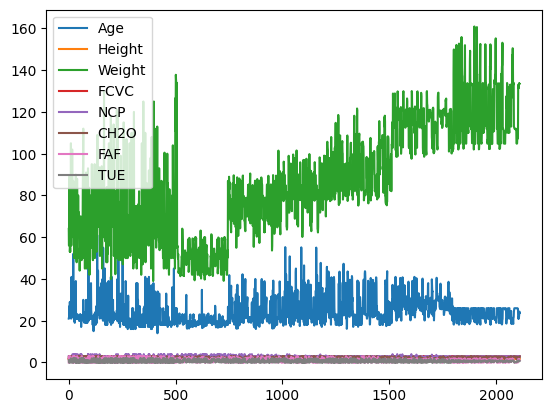

In [893]:
df.plot()

In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2085 non-null   object 
 1   Age                             2085 non-null   float64
 2   Height                          2085 non-null   float64
 3   Weight                          2085 non-null   float64
 4   family_history_with_overweight  2085 non-null   object 
 5   FAVC                            2085 non-null   object 
 6   FCVC                            2085 non-null   float64
 7   NCP                             2085 non-null   float64
 8   CAEC                            2085 non-null   object 
 9   SMOKE                           2085 non-null   object 
 10  CH2O                            2085 non-null   float64
 11  SCC                             2085 non-null   object 
 12  FAF                             2085 no

In [895]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [896]:
le.fit(df['Gender'])
df['Gender']=le.transform(df['Gender'])

le.fit(df['family_history_with_overweight'])
df['family_history_with_overweight']=le.transform(df['family_history_with_overweight'])

le.fit(df['FAVC'])
df['FAVC']=le.transform(df['FAVC'])

le.fit(df['CAEC'])
df['CAEC']=le.transform(df['CAEC'])

le.fit(df['SMOKE'])
df['SMOKE']=le.transform(df['SMOKE'])

le.fit(df['SCC'])
df['SCC']=le.transform(df['SCC'])

le.fit(df['CALC'])
df['CALC']=le.transform(df['CALC'])

le.fit(df['MTRANS'])
df['MTRANS']=le.transform(df['MTRANS'])

le.fit(df['NObeyesdad'])
df['NObeyesdad']=le.transform(df['NObeyesdad'])



C:\Users\rohit\AppData\Local\Temp\ipykernel_8316\288179486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=le.transform(df['Gender'])
C:\Users\rohit\AppData\Local\Temp\ipykernel_8316\288179486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['family_history_with_overweight']=le.transform(df['family_history_with_overweight'])
C:\Users\rohit\AppData\Local\Temp\ipykernel_8316\288179486.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2085 non-null   int32  
 1   Age                             2085 non-null   float64
 2   Height                          2085 non-null   float64
 3   Weight                          2085 non-null   float64
 4   family_history_with_overweight  2085 non-null   int32  
 5   FAVC                            2085 non-null   int32  
 6   FCVC                            2085 non-null   float64
 7   NCP                             2085 non-null   float64
 8   CAEC                            2085 non-null   int32  
 9   SMOKE                           2085 non-null   int32  
 10  CH2O                            2085 non-null   float64
 11  SCC                             2085 non-null   int32  
 12  FAF                             2085 no

<Axes: >

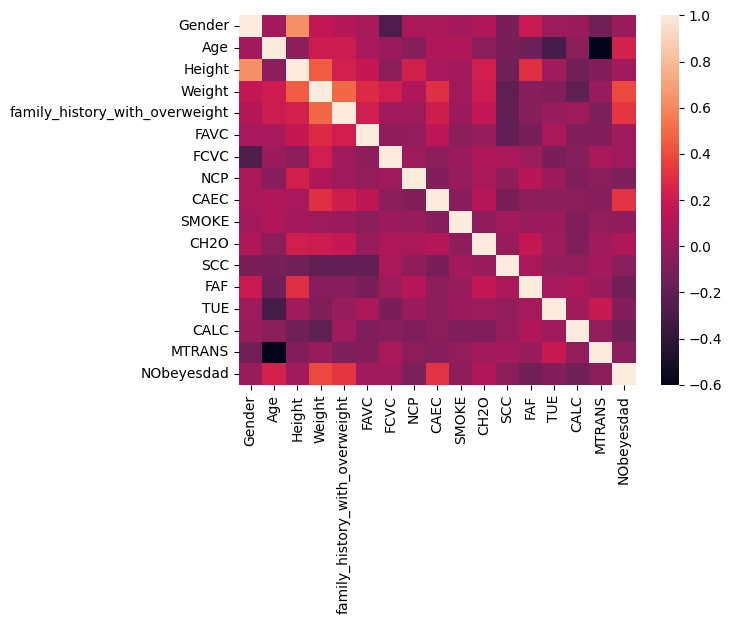

In [898]:
sns.heatmap(df.corr())

# Training and Testing

In [899]:
X=df.drop('NObeyesdad',axis=1)
y=df['NObeyesdad']

In [900]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [901]:
print("X_train = ",X_train.shape)
print("X_test = ",X_test.shape)
print("y_train = ",y_train.shape)
print("y_test = ",y_test.shape)

X_train =  (1668, 16)
X_test =  (417, 16)
y_train =  (1668,)
y_test =  (417,)


In [902]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top k features using SelectKBest
k = 5  # You can change this to the number of features you want to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)


X_train=X_train_kbest
X_test=X_test_kbest

# Model 1 Linear Regression

In [903]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()
li

LinearRegression()

In [904]:
li.fit(X_train,y_train)
y_pred=li.predict(X_test)
accuracy=li.score(X_test,y_test)
accuracy

0.1504976760326191

In [905]:
# Check for overfitting or underfitting
from sklearn.metrics import r2_score

#Predict on the training data
y_train_pred = li.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = li.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_r2 > test_r2 and (train_r2 - test_r2) > 0.1:
    print("The model is likely overfitting.")
elif train_r2 < test_r2:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely a good fit.


In [906]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(li,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.20118886 0.25796089 0.21217293 0.2161622  0.26317866]
Mean Cross validation score:  0.23013270636925892


In [907]:
#   Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    li=LinearRegression()
    li.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=li.predict(X_test_fold)

    #Evaluate the model
    accuracy=li.score(X_test_fold,y_test_fold)
    print("Fold Accuracy: ",accuracy)
    print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  -0.7604995626566917
Mean Fold Accuracy:  -0.7604995626566917
Fold Accuracy:  0.014621225111713043
Mean Fold Accuracy:  0.014621225111713043
Fold Accuracy:  -3.772992071722671
Mean Fold Accuracy:  -3.772992071722671
Fold Accuracy:  -15.350036217626268
Mean Fold Accuracy:  -15.350036217626268
Fold Accuracy:  -0.5428518307615404
Mean Fold Accuracy:  -0.5428518307615404


In [908]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.4909890201126064
Mean Squared Error (MSE): 3.153225764739265
Root Mean Squared Error (RMSE): 1.7757324586601624


In [909]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Linear Regression with PCA")
li_pca=LinearRegression()
li_pca.fit(X_train_pca,y_train)
y_pred_pca=li_pca.predict(X_test_pca)
accuracy_pca=li_pca.score(X_test_pca,y_test)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating Linear Regression with PCA
Accuracy with PCA:  0.1430686985143348


In [910]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Linear Regression with LDA")
li_lda=LinearRegression()
li_lda.fit(X_train_lda,y_train)
y_pred_lda=li_lda.predict(X_test_lda)
accuracy_lda=li_lda.score(X_test_lda,y_test)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Linear Regression with LDA
Accuracy with LDA:  0.16078368078056027


# Model 2 Logistic Regression

In [911]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [912]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy=lr.score(X_test,y_test)
accuracy

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6522781774580336

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


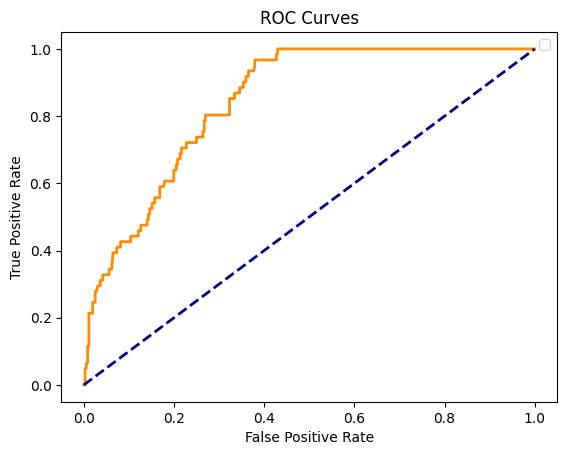

In [913]:
from sklearn.metrics import roc_curve,roc_auc_score

y_probs = lr.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
fpr, tpr, threshold = roc_curve(y_test, y_probs[:, 1], pos_label=1)

plt.plot(fpr, tpr,color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy',lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [914]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = lr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely underfitting.


In [915]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(lr,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.58083832 0.66766467 0.59580838 0.65765766 0.63063063]
Mean Cross validation score:  0.6265199331067594


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [916]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    lr=LogisticRegression()
    lr.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=lr.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Fold Accuracy:  0.2541966426858513
Fold Accuracy:  0.1486810551558753
Fold Accuracy:  0.22062350119904076
Fold Accuracy:  0.37410071942446044
Fold Accuracy:  0.18465227817745802


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [917]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3.07673860911271
0.8657074340527577
0.1711038810132467


In [918]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[40  8  0  0  0  5  2]
 [17 20  4  2  1  8  9]
 [ 0  0 44 15  1  1  5]
 [ 0  0  3 67  0  0  1]
 [ 0  0  0  0 57  0  0]
 [ 1  6 13  1  1 18 15]
 [ 0  7  6  2  3  8 26]]


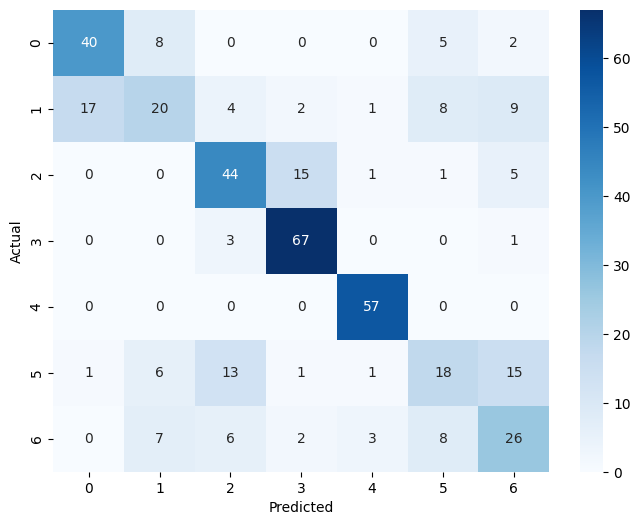

In [919]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [920]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Logistic Regression with PCA")
lr_pca=LogisticRegression()
lr_pca.fit(X_train_pca,y_train)
y_pred_pca=lr_pca.predict(X_test_pca)
accuracy_pca=lr_pca.score(X_test_pca,y_test)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating Logistic Regression with PCA
Accuracy with PCA:  0.645083932853717


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [921]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Logistic Regression with LDA")
lr_lda=LogisticRegression()
lr_lda.fit(X_train_lda,y_train)
y_pred_lda=lr_lda.predict(X_test_lda)
accuracy_lda=lr_lda.score(X_test_lda,y_test)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Logistic Regression with LDA
Accuracy with LDA:  0.6858513189448441


# Model 3 SVM

In [922]:
from sklearn.svm import SVC
svm_classifier=SVC(probability=True)
svm_classifier

SVC(probability=True)

In [923]:
from sklearn.metrics import accuracy_score

svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.539568345323741

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


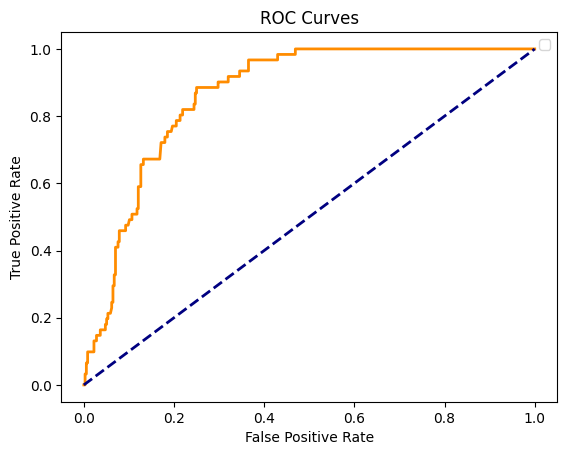

In [924]:
from sklearn.metrics import roc_curve,roc_auc_score

y_probs = svm_classifier.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
fpr, tpr, threshold = roc_curve(y_test, y_probs[:, 1], pos_label=1)

plt.plot(fpr, tpr,color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [925]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely underfitting.


In [926]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(svm_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.5239521  0.54491018 0.5        0.49249249 0.54954955]
Mean Cross validation score:  0.5221808634982288


In [927]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    svm_classifier=SVC(probability=True)
    svm_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=svm_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.2541966426858513


Fold Accuracy:  0.1366906474820144
Fold Accuracy:  0.2014388489208633
Fold Accuracy:  0.04316546762589928
Fold Accuracy:  0.19904076738609114


In [928]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("SVM Confusion Matrix: \n",cm)

SVM Confusion Matrix: 
 [[45 10  0  0  0  0  0]
 [25 23  0  0  0  8  5]
 [ 0  0 27 10  0  1 28]
 [ 0  0  8 52 11  0  0]
 [ 0  0 13 20 24  0  0]
 [ 3 18  3  0  0 19 12]
 [ 0  2 11  0  0  4 35]]


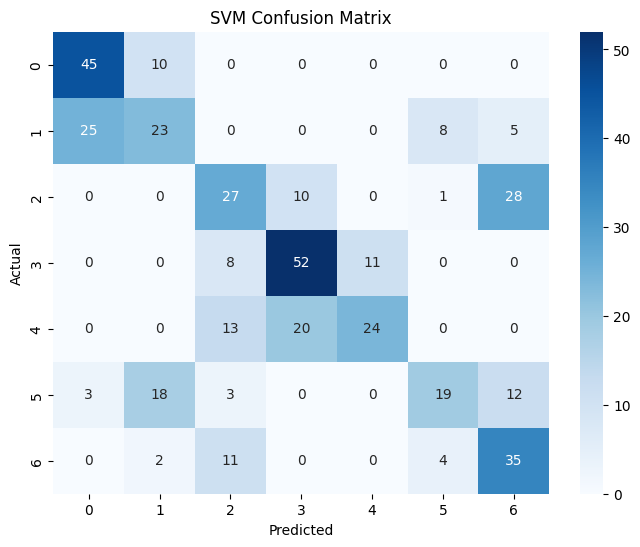

In [929]:
#Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [930]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.82      0.70        55
           1       0.43      0.38      0.40        61
           2       0.44      0.41      0.42        66
           3       0.63      0.73      0.68        71
           4       0.69      0.42      0.52        57
           5       0.59      0.35      0.44        55
           6       0.44      0.67      0.53        52

    accuracy                           0.54       417
   macro avg       0.55      0.54      0.53       417
weighted avg       0.55      0.54      0.53       417



In [931]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating SVM with PCA")
svm_classifier_pca=SVC(probability=True)
svm_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=svm_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating SVM with PCA
Accuracy with PCA:  0.6354916067146283


In [932]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating SVM with LDA")
svm_classifier_lda=SVC(probability=True)
svm_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=svm_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating SVM with LDA
Accuracy with LDA:  0.7170263788968825


# Model 4 Decision Tree

In [933]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier=DecisionTreeClassifier()
dt_classifier

DecisionTreeClassifier()

In [934]:
dt_classifier.fit(X_train,y_train)
y_pred=dt_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7673860911270983

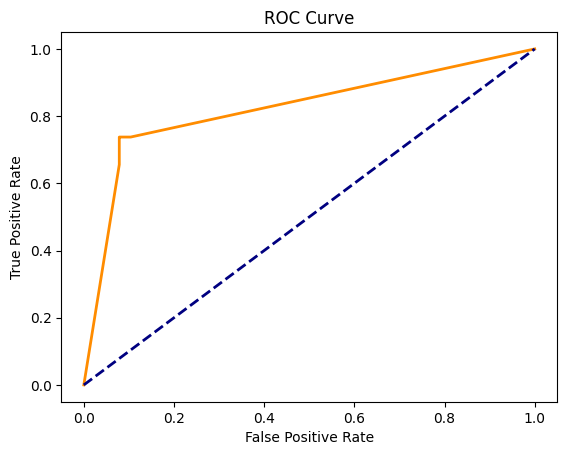

In [935]:
from sklearn.metrics import roc_curve,roc_auc_score

y_probs=dt_classifier.predict_proba(X_test)
roc_auc=roc_auc_score(y_test,y_probs,multi_class='ovr')
fpr,tpr,threshold=roc_curve(y_test,y_probs[:,1],pos_label=1)

plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [936]:
from sklearn.metrics import accuracy_score

y_train_pred=dt_classifier.predict(X_train)
train_accuracy=accuracy_score(y_train,y_train_pred)

y_test_pred=dt_classifier.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_pred)

if (train_accuracy>test_accuracy and train_accuracy-test_accuracy>0.1):
    print("The model is likely overfitting")
elif (train_accuracy<test_accuracy):
    print("The model is likely underfitting")
else:
    print("The model is likely a good fit")

The model is likely overfitting


In [937]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(dt_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.80838323 0.80239521 0.81137725 0.78978979 0.82582583]
Mean Cross validation score:  0.807554260847674


In [938]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely overfitting.


In [939]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    dt_classifier=DecisionTreeClassifier()
    dt_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=dt_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.6666666666666666
Fold Accuracy:  0.9184652278177458
Fold Accuracy:  0.7553956834532374
Fold Accuracy:  0.9184652278177458
Fold Accuracy:  0.9328537170263789


In [940]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("Decision Tree Confusion Matrix: \n",cm)

Decision Tree Confusion Matrix: 
 [[42 13  0  0  0  0  0]
 [ 3 45  0  0  0 11  2]
 [ 0  0 53  1  0  1 11]
 [ 0  0  8 63  0  0  0]
 [ 0  0  0  0 57  0  0]
 [ 0 11  1  0  0 28 15]
 [ 0  4  7  0  0  9 32]]


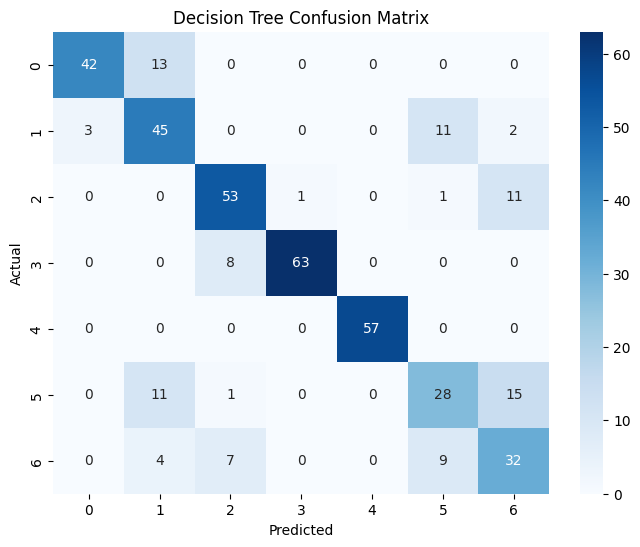

In [941]:
#Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [942]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        55
           1       0.62      0.74      0.67        61
           2       0.77      0.80      0.79        66
           3       0.98      0.89      0.93        71
           4       1.00      1.00      1.00        57
           5       0.57      0.51      0.54        55
           6       0.53      0.62      0.57        52

    accuracy                           0.77       417
   macro avg       0.77      0.76      0.76       417
weighted avg       0.78      0.77      0.77       417



In [943]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Decision Tree Classifier with PCA")
dt_classifier_pca=DecisionTreeClassifier()
dt_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=dt_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating Decision Tree Classifier with PCA
Accuracy with PCA:  0.7218225419664268


In [944]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Decision Tree Classifier with LDA")
dt_classifier_lda=DecisionTreeClassifier()
dt_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=dt_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Decision Tree Classifier with LDA
Accuracy with LDA:  0.7434052757793765


# Model 5 Random Forest

In [945]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier()
rf_classifier

RandomForestClassifier()

In [946]:
rf_classifier.fit(X_train,y_train)
y_pred=rf_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7913669064748201

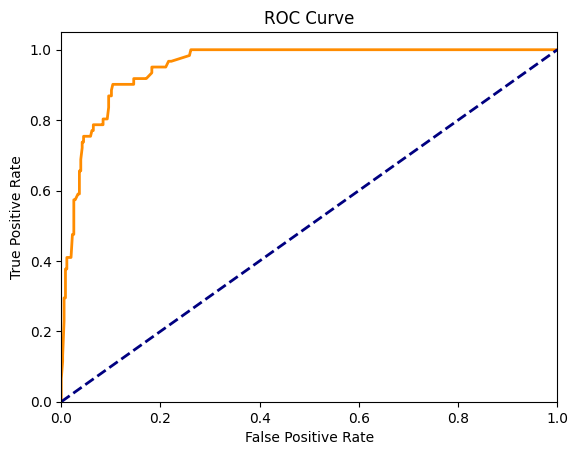

In [947]:
from sklearn.metrics import roc_curve,roc_auc_score

y_probs=rf_classifier.predict_proba(X_test)
roc_auc=roc_auc_score(y_test,y_probs,multi_class='ovr')
fpr,tpr,threshold=roc_curve(y_test,y_probs[:,1],pos_label=1)

plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [948]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely overfitting.


In [949]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(rf_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.83233533 0.80538922 0.82035928 0.84384384 0.84684685]
Mean Cross validation score:  0.8297549046052041


In [950]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    rf_classifier=RandomForestClassifier()
    rf_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=rf_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.5971223021582733


Fold Accuracy:  0.5491606714628298
Fold Accuracy:  0.5635491606714629
Fold Accuracy:  0.9424460431654677
Fold Accuracy:  1.0


In [951]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("Random Forest Confusion Matrix: \n",cm)

Random Forest Confusion Matrix: 
 [[47  8  0  0  0  0  0]
 [ 4 46  1  0  0  8  2]
 [ 0  0 54  1  0  2  9]
 [ 0  0  8 63  0  0  0]
 [ 0  0  0  0 57  0  0]
 [ 0  9  1  0  0 30 15]
 [ 0  5  6  0  0  8 33]]


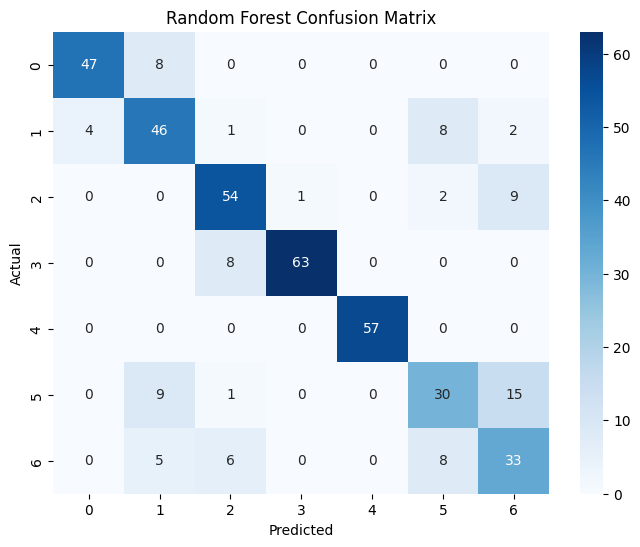

In [952]:
#Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [953]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89        55
           1       0.68      0.75      0.71        61
           2       0.77      0.82      0.79        66
           3       0.98      0.89      0.93        71
           4       1.00      1.00      1.00        57
           5       0.62      0.55      0.58        55
           6       0.56      0.63      0.59        52

    accuracy                           0.79       417
   macro avg       0.79      0.78      0.79       417
weighted avg       0.80      0.79      0.79       417



In [954]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Random Forest Classifier with PCA")
rf_classifier_pca=RandomForestClassifier()
rf_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=rf_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating Random Forest Classifier with PCA
Accuracy with PCA:  0.7769784172661871


In [955]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Random Forest Classifier with LDA")
rf_classifier_lda=RandomForestClassifier()
rf_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=rf_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Random Forest Classifier with LDA
Accuracy with LDA:  0.7721822541966427


# Model 6 K Neighbors

In [956]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier=KNeighborsClassifier()
knn_classifier

KNeighborsClassifier()

In [957]:
knn_classifier.fit(X_train,y_train)
y_pred=knn_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8033573141486811

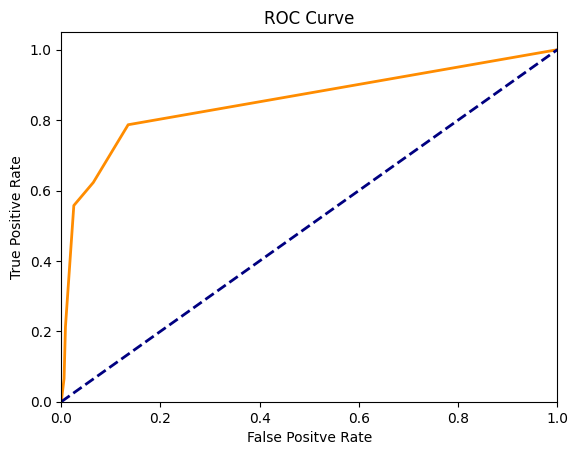

In [958]:
from sklearn.metrics import roc_curve,roc_auc_score

y_probs=knn_classifier.predict_proba(X_test)
roc_auc=roc_auc_score(y_test,y_probs,multi_class='ovr')
fpr,tpr,threshold=roc_curve(y_test,y_probs[:,1],pos_label=1)

plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [959]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = knn_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = knn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely a good fit.


In [960]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(knn_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.79640719 0.76047904 0.78143713 0.78378378 0.81981982]
Mean Cross validation score:  0.7883853913794033


In [961]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    knn_classifier=KNeighborsClassifier()
    knn_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=knn_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.4556354916067146
Fold Accuracy:  0.6115107913669064
Fold Accuracy:  0.48201438848920863
Fold Accuracy:  0.8705035971223022
Fold Accuracy:  0.5515587529976019


In [962]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("K Neighbors Confusion Matrix: \n",cm)

K Neighbors Confusion Matrix: 
 [[53  2  0  0  0  0  0]
 [16 35  1  0  0  5  4]
 [ 0  1 53  5  0  2  5]
 [ 0  0  2 69  0  0  0]
 [ 0  0  0  1 56  0  0]
 [ 0  5  1  0  0 37 12]
 [ 0  6  8  0  0  6 32]]


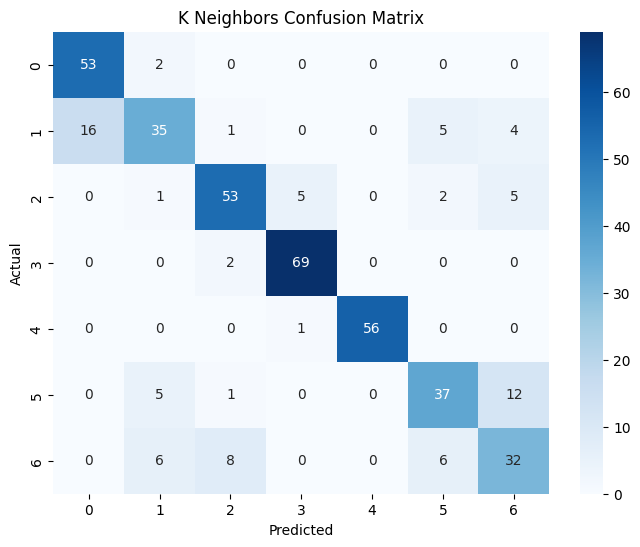

In [963]:
#Plotting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K Neighbors Confusion Matrix')
plt.show()

In [964]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85        55
           1       0.71      0.57      0.64        61
           2       0.82      0.80      0.81        66
           3       0.92      0.97      0.95        71
           4       1.00      0.98      0.99        57
           5       0.74      0.67      0.70        55
           6       0.60      0.62      0.61        52

    accuracy                           0.80       417
   macro avg       0.79      0.80      0.79       417
weighted avg       0.80      0.80      0.80       417



In [965]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating KNeighbors Classifier with PCA")
knn_classifier_pca=KNeighborsClassifier()
knn_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=knn_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating KNeighbors Classifier with PCA
Accuracy with PCA:  0.7242206235011991


In [966]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating KNeighbors Classifier with LDA")
knn_classifier_lda=KNeighborsClassifier()
knn_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=knn_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating KNeighbors Classifier with LDA
Accuracy with LDA:  0.7697841726618705


# Model 7 PLA 

In [967]:
from sklearn.linear_model import Perceptron

pla_classifier=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
pla_classifier

Perceptron(random_state=42)

In [968]:
pla_classifier.fit(X_train,y_train)
y_pred=pla_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.2278177458033573

In [971]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = pla_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = pla_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely a good fit.


In [972]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(pla_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.30538922 0.18862275 0.30538922 0.13513514 0.33033033]
Mean Cross validation score:  0.2529733326140512


In [973]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    pla_classifier=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
    pla_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=pla_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.11270983213429256
Fold Accuracy:  0.03597122302158273
Fold Accuracy:  0.0
Fold Accuracy:  0.0
Fold Accuracy:  0.12470023980815348


In [974]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("PLA Matrix: \n",cm)

PLA Matrix: 
 [[11  0  0  2  5  0 37]
 [ 4  0  0  5 15  0 37]
 [ 0  0  0 18 45  0  3]
 [ 0  0  0  4 67  0  0]
 [ 0  0  0  0 57  0  0]
 [ 0  0  0  5 29  0 21]
 [ 0  0  0 12 17  0 23]]


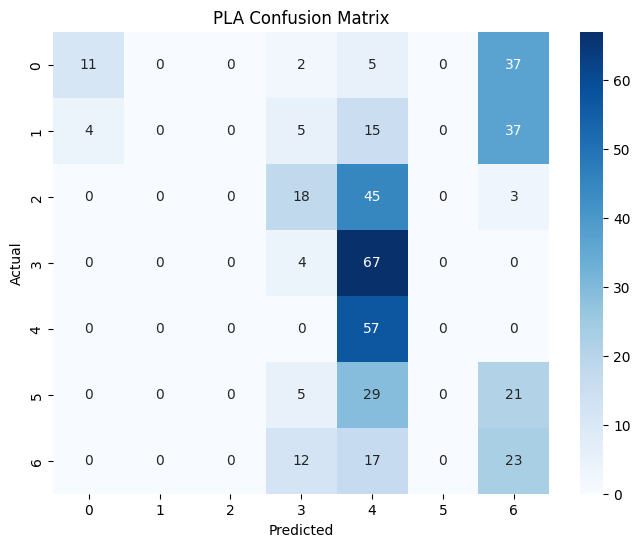

In [975]:
#Plotting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('PLA Confusion Matrix')
plt.show()

In [976]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.20      0.31        55
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        66
           3       0.09      0.06      0.07        71
           4       0.24      1.00      0.39        57
           5       0.00      0.00      0.00        55
           6       0.19      0.44      0.27        52

    accuracy                           0.23       417
   macro avg       0.18      0.24      0.15       417
weighted avg       0.17      0.23      0.14       417



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [977]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating PLA with PCA")
pla_classifier_pca=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
pla_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=pla_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating PLA with PCA
Accuracy with PCA:  0.27817745803357313


In [978]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Random Forest Classifier with LDA")
pla_classifier_lda=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
pla_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=pla_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Random Forest Classifier with LDA
Accuracy with LDA:  0.4460431654676259


# Model 8 MLP

In [979]:
from sklearn.neural_network import MLPClassifier

mlp_classifier=MLPClassifier(hidden_layer_sizes=(100,),max_iter=300,random_state=42)
mlp_classifier

MLPClassifier(max_iter=300, random_state=42)

In [980]:
mlp_classifier.fit(X_train,y_train)
y_pred=mlp_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.697841726618705

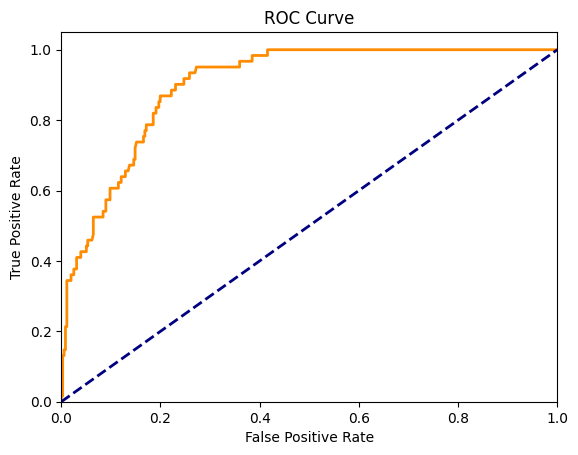

In [981]:
from sklearn.metrics import roc_curve,roc_auc_score

y_probs=mlp_classifier.predict_proba(X_test)
roc_auc=roc_auc_score(y_test,y_probs,multi_class='ovr')
fpr,tpr,threshold=roc_curve(y_test,y_probs[:,1],pos_label=1)

plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [982]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = mlp_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = mlp_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely underfitting.


In [983]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(mlp_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross validation score:  [0.61976048 0.65868263 0.61077844 0.66366366 0.66666667]
Mean Cross validation score:  0.6439103774433115


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [984]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    mlp_classifier=MLPClassifier(hidden_layer_sizes=(100,),max_iter=300,random_state=42)
    mlp_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=mlp_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.34772182254196643


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold Accuracy:  0.4892086330935252
Fold Accuracy:  0.290167865707434
Fold Accuracy:  0.7362110311750599
Fold Accuracy:  0.657074340527578


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [985]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("MLP Matrix: \n",cm)

MLP Matrix: 
 [[49  5  0  0  0  1  0]
 [20 28  1  2  0  8  2]
 [ 0  0 43 15  1  1  6]
 [ 0  0  5 65  0  0  1]
 [ 0  0  0  0 57  0  0]
 [ 0  6  4  1  1 21 22]
 [ 0  4  6  2  2 10 28]]


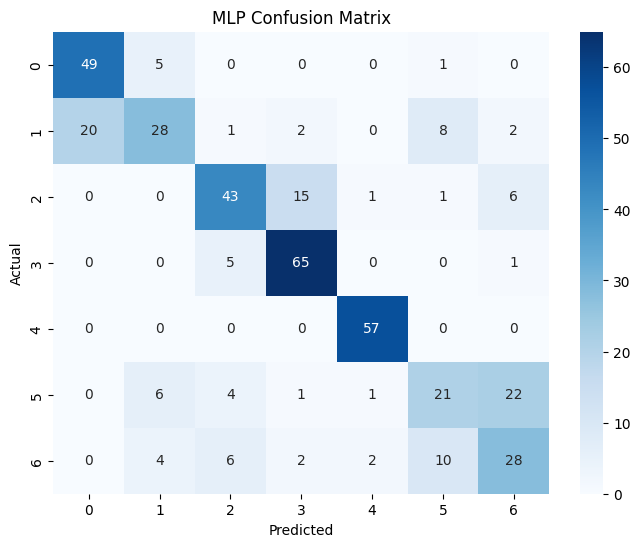

In [986]:
#Plotting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.show()

In [987]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        55
           1       0.65      0.46      0.54        61
           2       0.73      0.65      0.69        66
           3       0.76      0.92      0.83        71
           4       0.93      1.00      0.97        57
           5       0.51      0.38      0.44        55
           6       0.47      0.54      0.50        52

    accuracy                           0.70       417
   macro avg       0.68      0.69      0.68       417
weighted avg       0.69      0.70      0.69       417



In [988]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating MLP with PCA")
mlp_classifier_pca=MLPClassifier(hidden_layer_sizes=(100,),max_iter=300,random_state=42)
mlp_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=mlp_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating MLP with PCA
Accuracy with PCA:  0.6594724220623501


In [989]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating MLP with LDA")
mlp_classifier_lda=MLPClassifier(hidden_layer_sizes=(100,),max_iter=300,random_state=42)
mlp_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=mlp_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating MLP with LDA
Accuracy with LDA:  0.7170263788968825


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# Model 9 Naive Bayes

In [990]:
from sklearn.naive_bayes import GaussianNB

nb_classifier=GaussianNB()
nb_classifier

GaussianNB()

In [991]:
nb_classifier.fit(X_train,y_train)
y_pred=nb_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.580335731414868

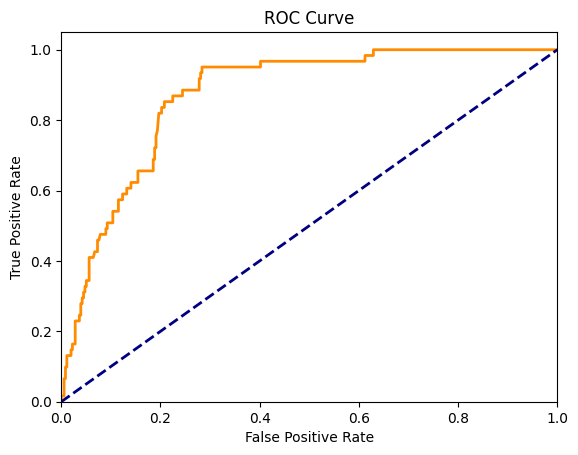

In [992]:
from sklearn.metrics import roc_curve,roc_auc_score

y_probs=nb_classifier.predict_proba(X_test)
roc_auc=roc_auc_score(y_test,y_probs,multi_class='ovr')
fpr,tpr,threshold=roc_curve(y_test,y_probs[:,1],pos_label=1)

plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [993]:
# Check for overfitting or underfitting
from sklearn.metrics import accuracy_score

#Predict on the training data
y_train_pred = nb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model is likely overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is likely a good fit.")

The model is likely a good fit.


In [994]:
# Perform 5-fold cross-validation
from sklearn.model_selection import train_test_split,cross_val_score,KFold

cv_scores=cross_val_score(nb_classifier,X_train,y_train,cv=5)

print("Cross validation score: ",cv_scores)
print("Mean Cross validation score: ",cv_scores.mean())

Cross validation score:  [0.60479042 0.58083832 0.53293413 0.6036036  0.61561562]
Mean Cross validation score:  0.5875564186941432


In [995]:
# Using KFold for Custom Cross-Validation
from sklearn.model_selection import KFold

#Initialize KFold with 5 splits
kf=KFold(n_splits=5)

#Iterate through KFold splits
for train_index,test_index in kf.split(X):
    X_train_fold,X_test_fold=X.iloc[train_index],X.iloc[test_index]
    y_train_fold,y_test_fold=y.iloc[train_index],y.iloc[test_index]

    #Initializ and fit the model
    nb_classifier=GaussianNB()
    nb_classifier.fit(X_train_fold,y_train_fold)

    #Predict on the test set
    y_pred_fold=nb_classifier.predict(X_test_fold)

    #Evaluate the model
    accuracy=accuracy_score(y_test_fold,y_pred_fold)
    print("Fold Accuracy: ",accuracy)
    # print("Mean Fold Accuracy: ",accuracy.mean())

Fold Accuracy:  0.19904076738609114
Fold Accuracy:  0.2709832134292566
Fold Accuracy:  0.15827338129496402
Fold Accuracy:  0.4676258992805755
Fold Accuracy:  0.9688249400479616


In [996]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("Naive Bayes Matrix: \n",cm)

Naive Bayes Matrix: 
 [[40 14  0  0  0  0  1]
 [18 24  0  0  2  7 10]
 [ 0  1 25 26  1  3 10]
 [ 0  0  0 71  0  0  0]
 [ 0  0  0  0 57  0  0]
 [ 3 12  4  0  4  8 24]
 [ 0  5 19  2  4  5 17]]


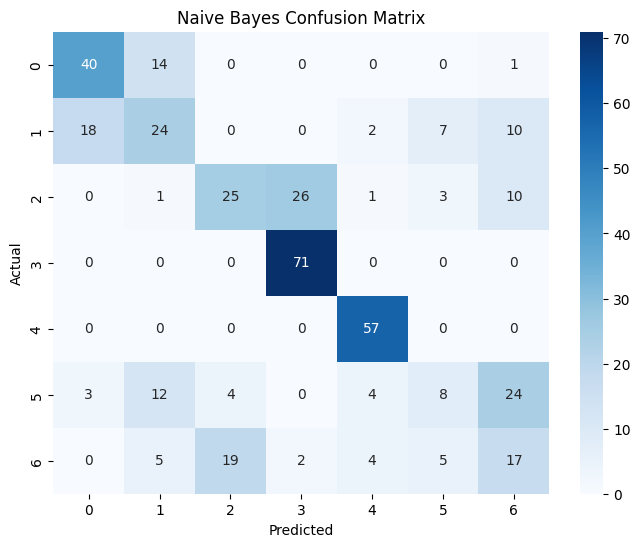

In [997]:
#Plotting Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [998]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        55
           1       0.43      0.39      0.41        61
           2       0.52      0.38      0.44        66
           3       0.72      1.00      0.84        71
           4       0.84      1.00      0.91        57
           5       0.35      0.15      0.21        55
           6       0.27      0.33      0.30        52

    accuracy                           0.58       417
   macro avg       0.54      0.57      0.54       417
weighted avg       0.55      0.58      0.55       417



In [999]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Naive Bayes with PCA")
nb_classifier_pca=GaussianNB()
nb_classifier_pca.fit(X_train_pca,y_train)
y_pred_pca=nb_classifier_pca.predict(X_test_pca)
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print("Accuracy with PCA: ",accuracy_pca)

Evaluating Naive Bayes with PCA
Accuracy with PCA:  0.6187050359712231


In [1000]:
# LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate the model with PCA
print("Evaluating Naive Bayes with LDA")
nb_classifier_lda=GaussianNB()
nb_classifier_lda.fit(X_train_lda,y_train)
y_pred_lda=nb_classifier_lda.predict(X_test_lda)
accuracy_lda=accuracy_score(y_test,y_pred_lda)
print("Accuracy with LDA: ",accuracy_lda)

Evaluating Naive Bayes with LDA
Accuracy with LDA:  0.6858513189448441


# Model 10 KMeans Clustering

In [1001]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [1002]:
kmeans.fit(X)
y_pred=kmeans.predict(X)

from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(X,y_pred)
print("silhouette_score: ",silhouette_avg)

silhouette_score:  0.5050222435923701


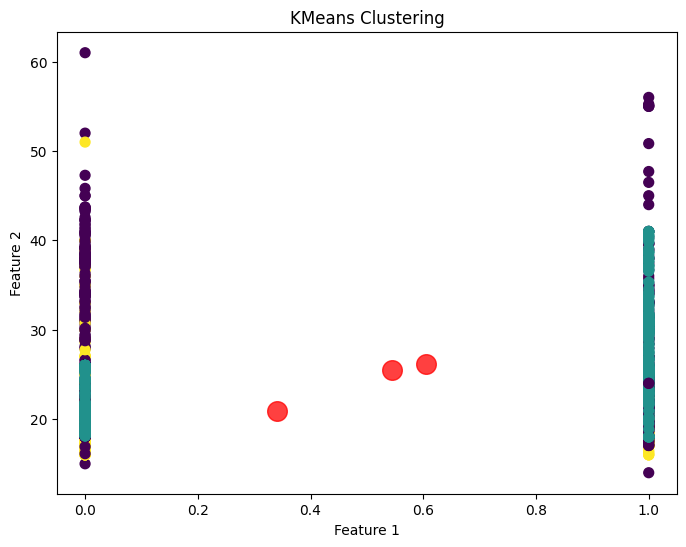

In [1003]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_pred,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.75)
plt.title('KMeans Clustering')      #alpha=0.75 sets the transparency of the cluster centers to 75%.
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Model 11 Dimensionality Reduction using PCA

In [1004]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca

PCA(n_components=2)

In [1005]:
X_pca=pca.fit_transform(X)

C:\Users\rohit\AppData\Local\Temp\ipykernel_8316\2795715780.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0],X_pca[:,1],cmap='viridis')


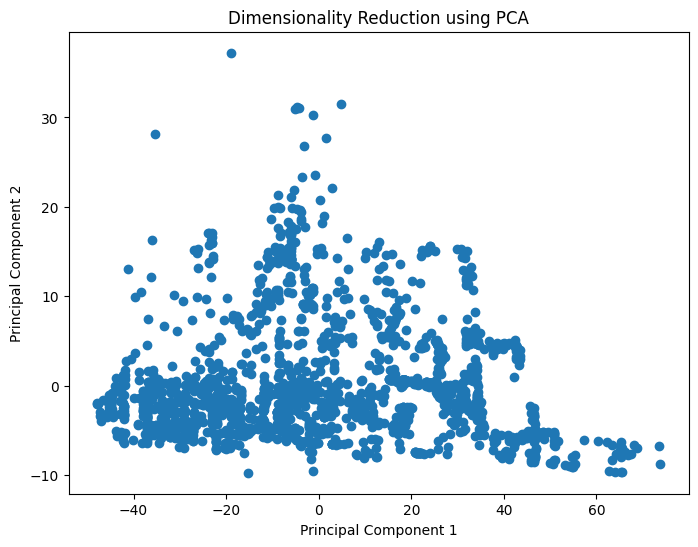

In [1006]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],cmap='viridis')
plt.title('Dimensionality Reduction using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Model 12 Dimensionality Reduction using LDA

In [1007]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
lda

LinearDiscriminantAnalysis(n_components=2)

In [1008]:
X_lda=lda.fit_transform(X,y)

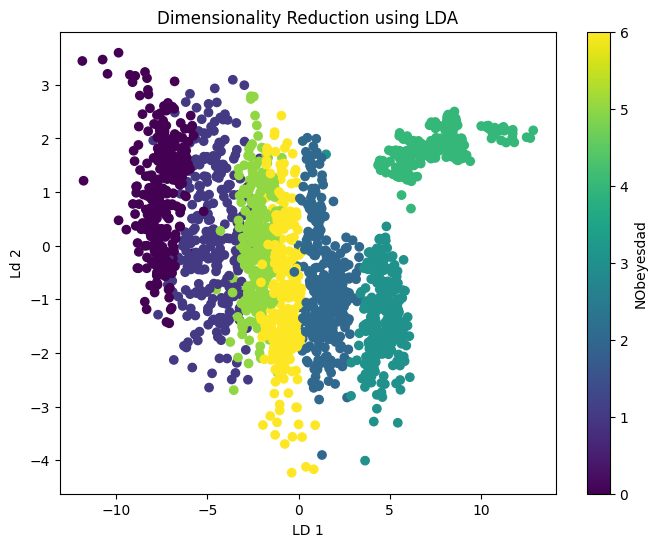

In [1009]:
plt.figure(figsize=(8,6))
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap='viridis')
plt.xlabel('LD 1')
plt.ylabel("Ld 2")
plt.title("Dimensionality Reduction using LDA")
plt.colorbar(label='NObeyesdad')
plt.show()

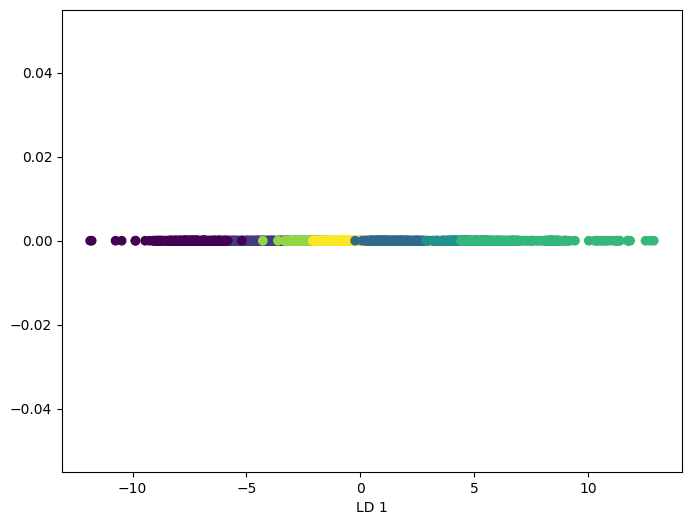

In [1010]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=min(X.shape[1], len(np.unique(y)) - 1))
lda

X_lda=lda.fit_transform(X,y) # n_components cannot be larger than min(n_features, n_classes - 1).

plt.figure(figsize=(8,6))
plt.scatter(X_lda[:,0], np.zeros_like(X_lda[:,0]), c=y, cmap='viridis')
plt.xlabel('LD 1')
plt.show()